In [38]:
import random
import torch
from torch import nn
import math
from IPython import display

In [39]:
from plot_lib import plot_data, plot_model, set_default
import matplotlib.pyplot as plt

In [40]:
set_default()

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [106]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 10  # num_hidden_units # for learn try to change this and run models

In [107]:
# create noisy data with a function base (y = x * x or anything else you can do)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(2) + 0.3 * torch.rand(X.size()).to(device) # or we can change this (change main fucntion x and y)

In [108]:
# number of input and output must be the same
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


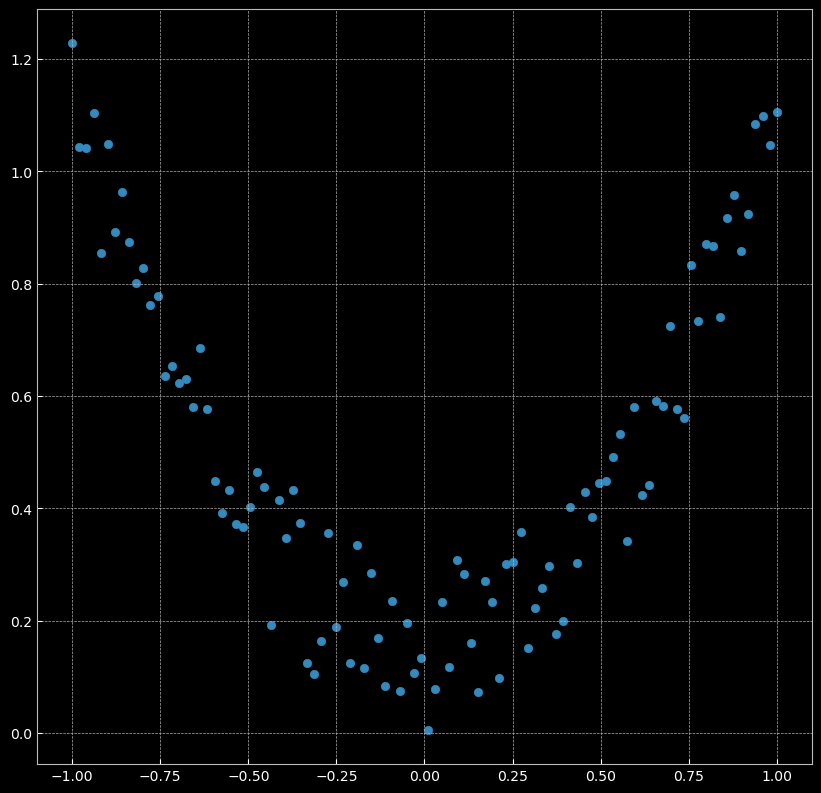

In [109]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy()) # plot x and y 

In [110]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [111]:

model = nn.Sequential(nn.Linear(D, H),  # init our model with just linearity
                      nn.Linear(H, C))

model.to(device)    # to device gpu or cpu

criterion = nn.MSELoss()    # Loss function (MSE)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = lambda_l2)

epochs = 500

# train
for i in range(epochs):

    y_pred = model(X)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (i, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


[EPOCH]: 499, [LOSS or MSE]: 0.096423


In [112]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)


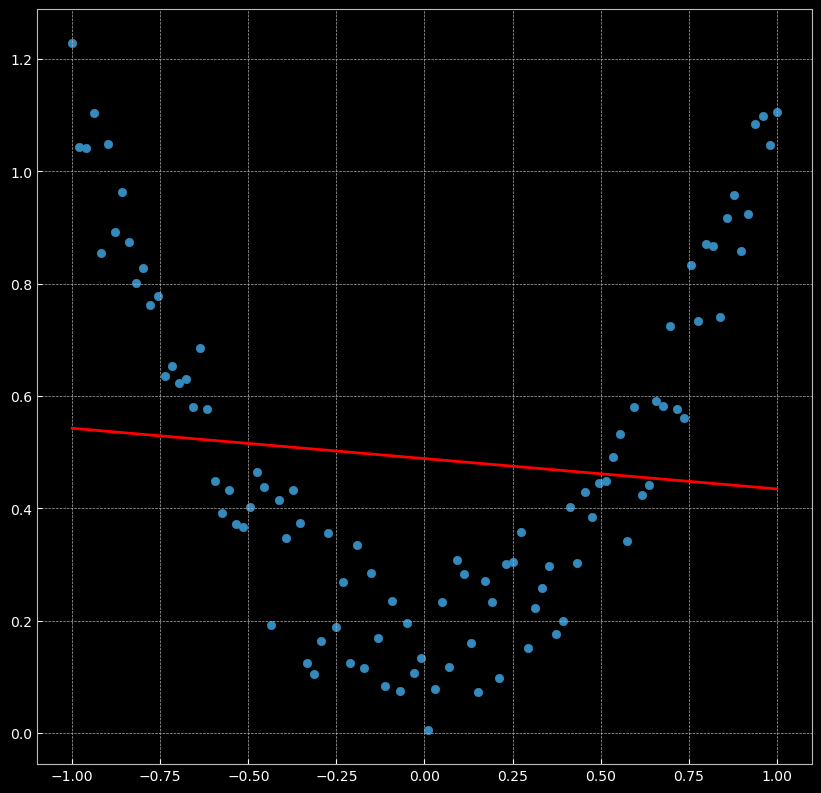

In [114]:
# PLot our regression model (Linear regression( this is underfit cuz we have no non linearity))
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(),c = "r")

---

In [115]:
learning_rate = 1e-1
lambda_l2 = 1e-5

In [116]:
# a model with tgh non linearity in between
model_tg = nn.Sequential(nn.Linear(D, H),
                         nn.Tanh(),
                         nn.Linear(H, C))

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_tg.parameters(), lr = learning_rate, weight_decay = lambda_l2)

epochs = 500
# train
for i in range(epochs):
    y_pred1 = model_tg(X)
    loss = criterion(y_pred1, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (i, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


[EPOCH]: 499, [LOSS or MSE]: 0.006450


In [117]:
learning_rate = 1e-1
lambda_l2 = 1e-5

In [118]:
# another model with non linearity function (activation function relu(linear non-linearity!))
model_rl = nn.Sequential(nn.Linear(D, H),
                         nn.ReLU(),
                         nn.Linear(H, C))

criterion2 = nn.MSELoss()
optimizer2 = torch.optim.Adam(model_rl.parameters(), lr = learning_rate, weight_decay = lambda_l2)

epochs = 500
# train
for i in range(epochs):
    y_pred2 = model_rl(X)
    loss2 = criterion2(y_pred2, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (i, loss2.item()))
    display.clear_output(wait=True)
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()

[EPOCH]: 499, [LOSS or MSE]: 0.007170


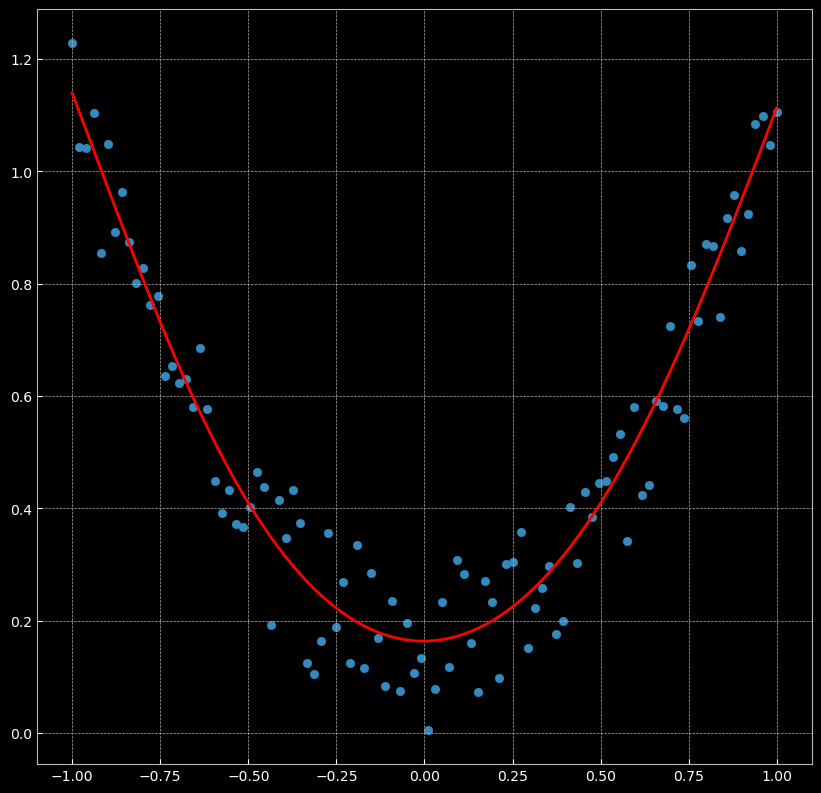

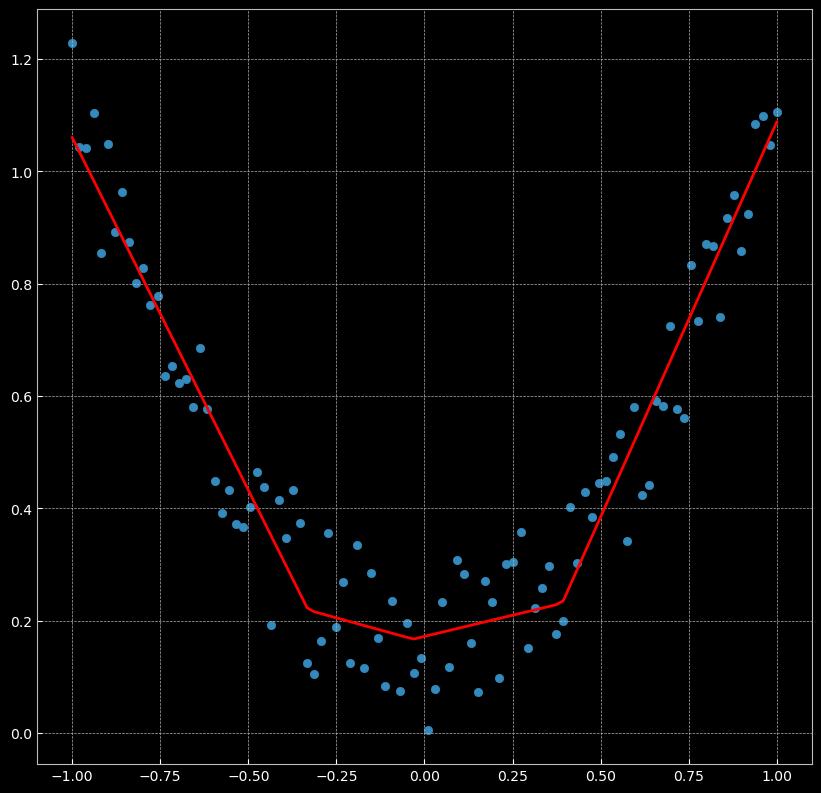

In [119]:
# plot our model (tanh and relu activation function)
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred1.data.cpu().numpy(), 'r')
plt.show()
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred2.data.cpu().numpy(), 'r')
plt.show()
